In [2]:
%tensorflow_version 1.x
# import tensorflow
# print(tensorflow.__version__)

TensorFlow 1.x selected.


In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

n_layers = 24
n_neurons = 6
n_inputs = 3
n_outputs = 1
file_path = "../content/drive/My Drive/VDK/data/dananghour3.csv"
def read_data(file_path):
  data=pd.read_csv(file_path, delimiter=',',header=11,skipinitialspace=True, usecols=['Temperature', 'Relative Humidity', 'Mean Sea Level Pressure'] )
  X = np.array(data)
  return X
X = read_data(file_path)
y = X[1:, 0].reshape(-1, 1)
X_test = X[:X.shape[0]-24]
y_test = y[:y.shape[0]-23]
print(X_test.shape, y_test.shape)

(336, 3) (336, 1)


In [6]:
def create_batches(X, y, n_layer, n_input, n_output):
  X_batches = X.reshape(-1, n_layer, n_input)
  y_batches = y.reshape(-1, n_layer, n_output)
  return X_batches, y_batches
X_batches, y_batches = create_batches(X_test, y_test, n_layers, n_inputs, n_outputs)
print(X_batches.shape, y_batches.shape)

(14, 24, 3) (14, 24, 1)


import numpy as np
X = [{'temperature': '25', 'humidity': '85', 'pressure': '1001', 'rain': '0'}, {'temperature': '23', 'humidity': '85', 'pressure': '1001', 'rain': '0'}, {'temperature': '23', 'humidity': '85', 'pressure': '1001', 'rain': '0'}, {'temperature': '23', 'humidity': '85', 'pressure': '1005', 'rain': '0'}, {'temperature': '23', 'humidity': '85', 'pressure': '1005', 'rain': '0'}, {'temperature': '23', 'humidity': '85', 'pressure': '1005', 'rain': '0'}, {'temperature': '23', 'humidity': '85', 'pressure': '1005', 'rain': '0'}, {'temperature': '23', 'humidity': '85', 'pressure': '1005', 'rain': '0'}, {'temperature': '23', 'humidity': '85', 'pressure': '1005', 'rain': '0'}, {'temperature': '23', 'humidity': '85', 'pressure': '1005', 'rain': '0'}, {'temperature': '23', 'humidity': '85', 'pressure': '1005', 'rain': '0'}, {'temperature': '23', 'humidity': '85', 'pressure': '1005', 'rain': '0'}, {'temperature': '23', 'humidity': '85', 'pressure': '1005', 'rain': '0'}, {'temperature': '23', 'humidity': '85', 'pressure': '1005', 'rain': '0'}, {'temperature': '23', 'humidity': '85', 'pressure': '1005', 'rain': '0'}, {'temperature': '23', 'humidity': '85', 'pressure': '1005', 'rain': '0'}, {'temperature': '23', 'humidity': '85', 'pressure': '1005', 'rain': '0'}, {'temperature': '23', 'humidity': '85', 'pressure': '1005', 'rain': '0'}, {'temperature': '23', 'humidity': '85', 'pressure': '1005', 'rain': '0'}, {'temperature': '23', 'humidity': '85', 'pressure': '1005', 'rain': '0'}]
data = np.empty((0, 4))
for item in X:
  list_values = [ v for v in item.values() ]
  x = np.array(list_values, dtype = np.float32).reshape(-1, 4)
  data = np.concatenate((data, x), axis = 0)
print(data)

INFO:tensorflow:Restoring parameters from ../content/drive/My Drive/VDK/model_none_total_precipitation/model.ckpt
(14, 24, 1)


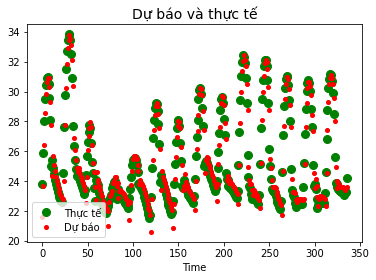

In [7]:

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  saver = tf.train.import_meta_graph("../content/drive/My Drive/VDK/model_none_total_precipitation/model.ckpt.meta")
  save_path = saver.restore(sess, "../content/drive/My Drive/VDK/model_none_total_precipitation/model.ckpt")
  graph = tf.get_default_graph()
  get = graph.get_tensor_by_name('Reshape_1:0')
  X = graph.get_tensor_by_name('Placeholder:0')
  y_pred = sess.run(get, feed_dict={X: X_batches})
print(y_pred.shape)
plt.title("Dự báo và thực tế", fontsize=14)
plt.plot(pd.Series(np.ravel(y_batches)), "bo", markersize=8, label="Thực tế", color='green')
plt.plot(pd.Series(np.ravel(y_pred)), "r.", markersize=8, label="Dự báo", color='red')
plt.legend(loc="lower left")
plt.xlabel("Time")

plt.show()

In [8]:
print(np.mean((y_batches - y_pred)*(y_batches-y_pred)))


0.8740648700165802
